In [1]:
import gc
import pandas as pd
import numpy as np
import pandas as pd
#import lightgbm as lgb
#import xgboost as xgb
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
import gc
import os

os.chdir('C:/Users/Jesse/Python Scripts/Data mining assignment 2')

gc.enable()
# variable types & measurement level (boolean, nominal, ordinal, interval/ratio), missing values, comments
# VALUES ARE BASED ON TRAINING SET!!
dtypes = {'srch_id': 'int32' # id variable, 0% missing
        , 'site_id':'int32' # nominal, 0% missing
        , 'visitor_location_country_id' : 'int32' # nominal, 0% missing
        , 'visitor_hist_starrating' :'float16' # interval/ratio, 94.9% missing
        , 'visitor_hist_adr_usd' : 'float16' # interval/ratio, 94.9% missing
        , 'prop_country_id' : 'int32' # nominal, 0% missing
        , 'prop_id' : 'int32' # nominal, 0% missing, TARGET
        , 'prop_starrating' : 'int8' # ordinal, 0% missing, 0 no stars due to unknown so maybe recode
        , 'prop_review_score' : 'float16' # ordinal, 0.15% missing, 0 means no reviews/unavaillable so maybe recode
        , 'prop_brand_bool': 'int8' # boolean, 0% missing
        ,'prop_location_score1' :'float16' # interval/ratio, 0% missing
        , 'prop_location_score2' : 'float16' #interval/ratio, 22% missing
        ,'prop_log_historical_price' : 'float16' #interval/ratio (scaled by log), 0% missing
        , 'position': 'int16' # interval (discrete), 0% missing, (not availlable in test)
        , 'price_usd' : 'float32' # interval/ratio, 0% missing
        , 'promotion_flag': 'int8' # boolean, 0% missing
        ,'srch_destination_id' : 'int32' #nominal, 0% missing, maybe compare with prop_country_id?
        , 'srch_length_of_stay' : 'int16' # interval (discrete), 0% missing
        , 'srch_booking_window': 'int16' # interval (discrete), 0% missing
        ,'srch_adults_count': 'int16' # interval (discrete), 0% missing
        , 'srch_children_count': 'int16' # interval (discrete), 0% missing
        , 'srch_room_count': 'int16' # interval (discrete), 0% missing
        ,'srch_saturday_night_bool':'int8' #boolean, 0% missing
        , 'srch_query_affinity_score' : 'float32' # interval/ratio, 93.6% missing
        ,'orig_destination_distance' : 'float32' # interval/ratio ,32.4%
        , 'random_bool':'int8' # boolean, 0% missing
        , 'comp1_rate': 'float16' # ordinal (kind of),97.6% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp1_inv' : 'float16' # ordinal (kind of), 97.4% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp1_rate_percent_diff' : 'float64' # ratio, 98% missing
        , 'comp2_rate' : 'float16' # ordinal (kind of),59.2% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp2_inv' : 'float16'  # ordinal (kind of),57.0% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp2_rate_percent_diff' : 'float64' # ratio, 88.8% missing
        , 'comp3_rate' : 'float16'  # ordinal (kind of),69.1% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp3_inv' : 'float16'  # ordinal (kind of),66.7% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp3_rate_percent_diff' : 'float64' # ratio, 90.5% missing
        , 'comp4_rate' : 'float16'  # ordinal (kind of),93.8% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp4_inv' : 'float16'  # ordinal (kind of),93.1% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp4_rate_percent_diff' : 'float64' # ratio, 97.4% missing,
        , 'comp5_rate' : 'float16'  # ordinal (kind of),97.6% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp5_inv' : 'float16'  # ordinal (kind of),97.6% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp5_rate_percent_diff' : 'float64' # ratio, 83.0% missing
        , 'comp6_rate' : 'float16'  # ordinal (kind of),95.2% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp6_inv' : 'float16'  # ordinal (kind of),94.7% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp6_rate_percent_diff' : 'float64' #ratio, 98.1% missing
        , 'comp7_rate': 'float16'  # ordinal (kind of),93.6% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp7_inv': 'float16'  # ordinal (kind of),92.8% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp7_rate_percent_diff' : 'float64' # ratio, 97.2% missing
        , 'comp8_rate' : 'float16'  # ordinal (kind of),61.3% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'comp8_inv' : 'float16'  # ordinal (kind of),59.9% missing, 0 means no data availlable & is an int with nan values so convert later
        ,'comp8_rate_percent_diff' : 'float64'  # ordinal (kind of),87.6% missing, 0 means no data availlable & is an int with nan values so convert later
        , 'click_bool' : 'int8' #boolean, 0% missing, TARGET
        , 'gross_bookings_usd' : 'float32' #interval/ratio, 0% missing TARGET
        ,'booking_bool' : 'int8', #boolean, 0% missing, TARGET
}

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
parse_dates = ['date_time']
#print('Download Train and Test Data.\n')
train = pd.read_csv('training_set_VU_DM.csv', dtype=dtypes,parse_dates=parse_dates, low_memory=True)
test =pd.read_csv('test_set_VU_DM.csv', dtype=dtypes,parse_dates=parse_dates, low_memory=True)
gc.collect()


0

In [1]:
import gc
import pandas as pd
import numpy as np
import pandas as pd
#import lightgbm as lgb
#import xgboost as xgb
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
import gc
import os
import pandas as pd

os.chdir('C:/Users/Jesse/Python Scripts/Data mining assignment 2')

gc.enable()

import pickle
 
# load model from file
train = pd.read_pickle("./train_pickle.pkl")
test =  pd.read_pickle("./test_pickle.pkl")

gc.collect()

0

In [33]:
def markBoolean(x,value):
    if x == 1:
        return value
    return 0

def substitute_y_for_z(x,y,z):
    if x == y:
        return z
    return x

train['booking_bool_help'] = train['booking_bool'].apply(lambda x: markBoolean(x,5))
train['relevance_grades']= train['booking_bool_help'] + train['click_bool'] 
train['relevance_grades'] = train['relevance_grades'].apply(lambda x: substitute_y_for_z(x,6,5))

del train['booking_bool_help']

In [10]:
cols = test.columns.tolist()
missing_values_df = pd.DataFrame(columns=['column','number of missing values (train)','percentage (train)'
                                         ,'number of missing values (test)','percentage (test)'])
for col in cols:
    row = {'column':col
            ,'number of missing values (train)':train[col].isnull().sum()
            ,'percentage (train)':train[col].isnull().sum()*100 / len(train)
            ,'number of missing values (test)':test[col].isnull().sum()
            ,'percentage (test)':test[col].isnull().sum()*100 / len(test)}
    missing_values_df = missing_values_df.append(row,ignore_index=True)
print(missing_values_df)
del row, col
gc.collect()


                         column number of missing values (train)  \
0                       srch_id                                0   
1                     date_time                                0   
2                       site_id                                0   
3   visitor_location_country_id                                0   
4       visitor_hist_starrating                          4706481   
5          visitor_hist_adr_usd                          4705359   
6               prop_country_id                                0   
7                       prop_id                                0   
8               prop_starrating                                0   
9             prop_review_score                             7364   
10              prop_brand_bool                                0   
11         prop_location_score1                                0   
12         prop_location_score2                          1090348   
13    prop_log_historical_price                 

0

In [11]:
from scipy import stats

skipcols= ['site_id','srch_id','date_time','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id']
summary_df = pd.DataFrame(index=['count','mean','std','min','25%','50%','75%','max','median','kurtosis','skewness','missing_values','percentage_missing_values'])
for usecol in train.columns.tolist():
    if usecol in skipcols:
        continue
    train_filtered = train[usecol].dropna(axis=0)
    desc = stats.describe(train_filtered)
    add_descriptives = train_filtered.describe(include ='all').to_frame()
    add_descriptives.loc['mean'] = np.mean(train_filtered.tolist())
    add_descriptives.loc['median'] = train_filtered.median()
    add_descriptives.loc['kurtosis'] = desc.kurtosis
    add_descriptives.loc['skewness'] = desc.skewness
    add_descriptives.loc['missing_values'] = train[usecol].isna().sum()
    add_descriptives.loc['percentage_missing_values'] = (train[usecol].isna().sum()*100) /len(train[usecol])
    summary_df =summary_df.merge(add_descriptives,left_index=True,right_index=True)

print(np.round(summary_df, decimals=2))

del skipcols,add_descriptives,desc,train_filtered
gc.collect()


C:\Users\Jesse\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jesse\Anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\Jesse\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jesse\Anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\Jesse\Anaconda3\lib\site-packages\scipy\stats\stats.py:973: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
C:\Users\Jesse\Anaconda3\lib\site-packages\scipy\stats\stats.py:977: RuntimeWarning: overflow encountered in square
  s = s**2
C:\Users\Jesse\Anaconda3\lib\site-pa

                           visitor_hist_starrating  visitor_hist_adr_usd  \
count                                    251866.00             252988.00   
mean                                          3.37                176.02   
std                                           0.00                   NaN   
min                                           1.41                  0.00   
25%                                           2.92                109.81   
50%                                           3.45                152.25   
75%                                           3.93                213.50   
max                                           5.00               1959.00   
median                                        3.45                152.25   
kurtosis                                     -0.44                   NaN   
skewness                                     -0.08                   NaN   
missing_values                          4706481.00            4705359.00   
percentage_m

168

In [12]:
print(pd.crosstab(train['booking_bool'] ,train['click_bool']))
print(pd.crosstab(train['random_bool'] ,train['click_bool']))
print(pd.crosstab(train['random_bool'] ,train['booking_bool']))

click_bool          0       1
booking_bool                 
0             4736468   83489
1                   0  138390
click_bool         0       1
random_bool                 
0            3337668  153502
1            1398800   68377
booking_bool        0       1
random_bool                  
0             3360592  130578
1             1459365    7812


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(5,4)})

sns.set(style="whitegrid")
ax = sns.boxplot(x= train['booking_bool'], y=train['position'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axes.set_title("booking bool vs. position",fontsize=35)
ax.set_xlabel("booking bool",fontsize=30)
ax.set_ylabel("position",fontsize=20)
plt.show()

plt.clf()
plt.close()

sns.set(rc={'figure.figsize':(5,4)})

sns.set(style="whitegrid")
ax = sns.boxplot(x= train['click_bool'], y=train['position'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axes.set_title("click bool vs. position",fontsize=35)
ax.set_xlabel("click bool",fontsize=30)
ax.set_ylabel("position",fontsize=20)

plt.show()

plt.clf()
plt.close()

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

In [4]:
train.columns.to_list()

['srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',


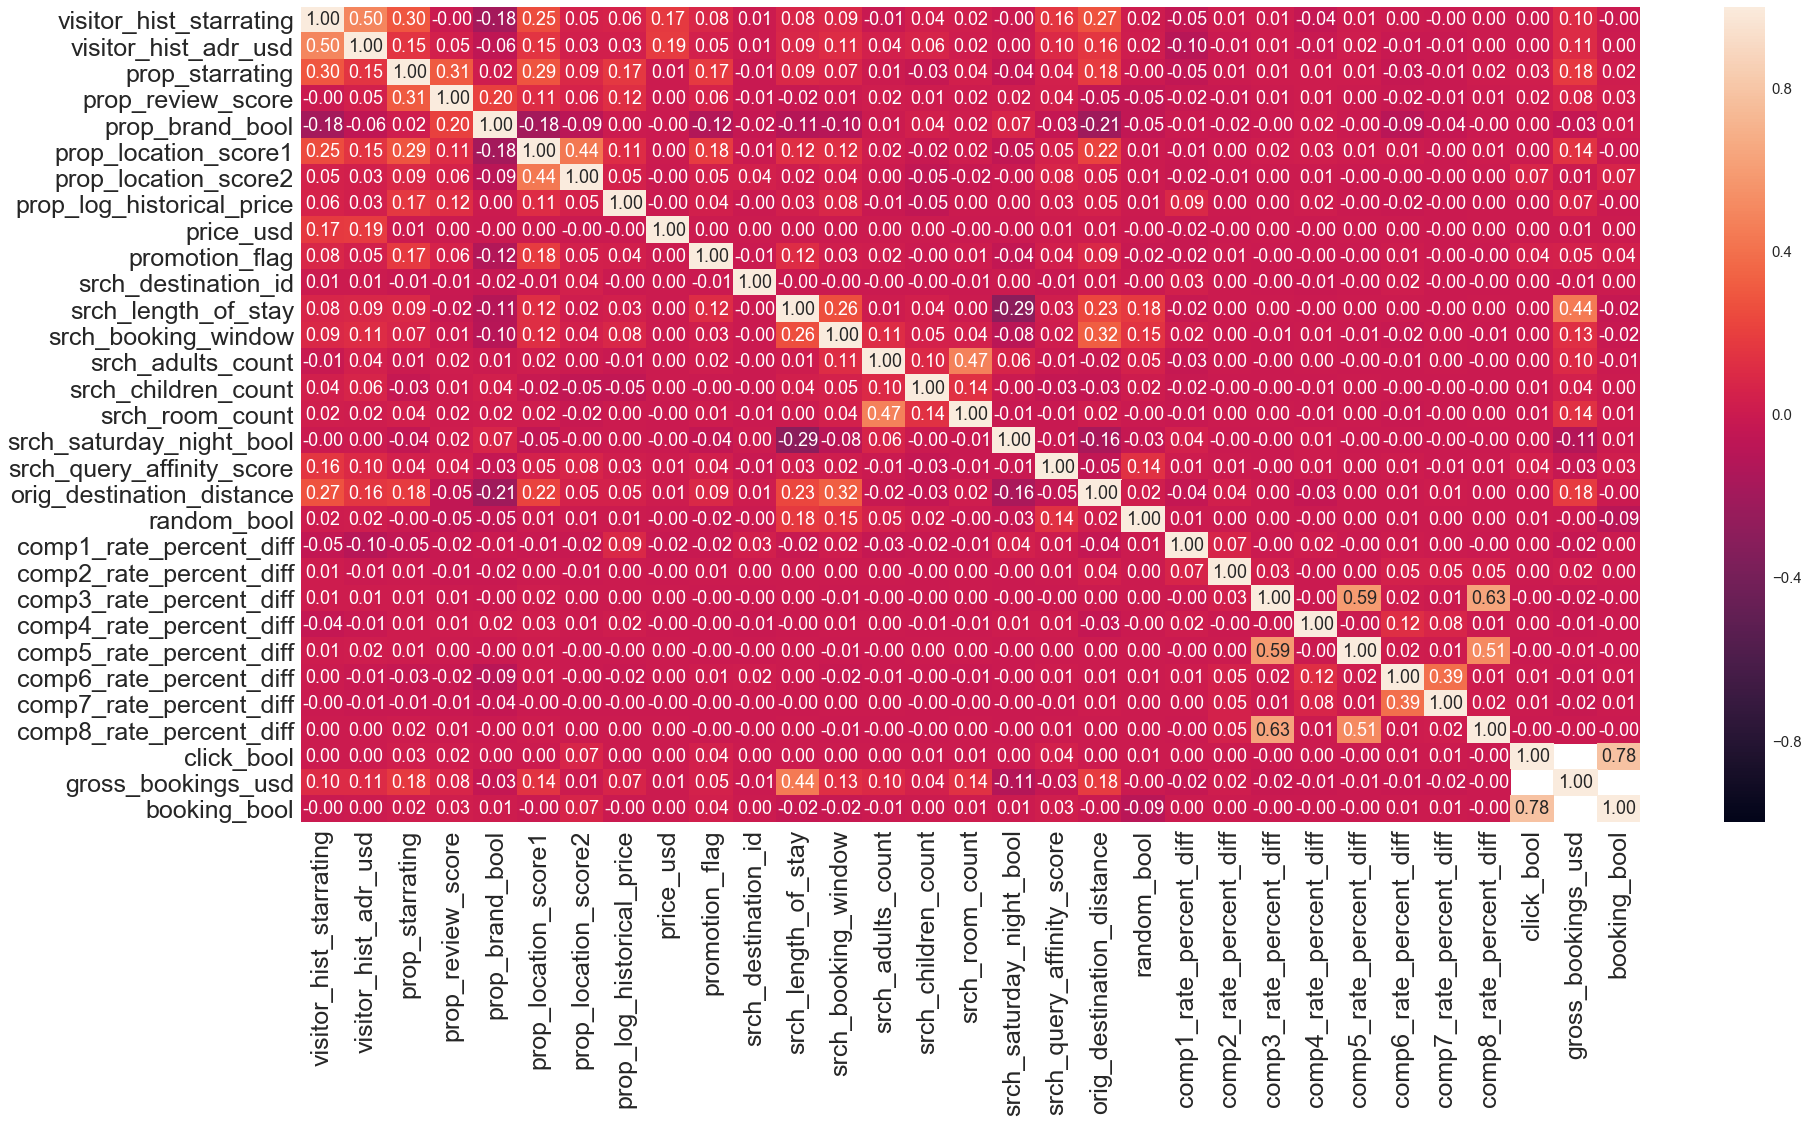

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30,15)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

cols =[
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp1_rate_percent_diff',
 'comp2_rate_percent_diff',
 'comp3_rate_percent_diff',
 'comp4_rate_percent_diff',
 'comp5_rate_percent_diff',
 'comp6_rate_percent_diff',
 'comp7_rate_percent_diff',
 'comp8_rate_percent_diff',
 'click_bool',
 'gross_bookings_usd',
 'booking_bool']
corr = train[cols].corr(method='pearson')

fig, ax = plt.subplots()
sns.set(font_scale=1.5)
ax.set_xticklabels(labels = corr.columns.values,rotation=90)
sns.heatmap(corr, 
            yticklabels=corr.columns.values, ax=ax,annot = True, fmt = '.2f'
           , vmin=-1, vmax=1)
ax.tick_params(labelsize=25)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

cols =[
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp1_rate_percent_diff',
 'comp2_rate_percent_diff',
 'comp3_rate_percent_diff',
 'comp4_rate_percent_diff',
 'comp5_rate_percent_diff',
 'comp6_rate_percent_diff',
 'comp7_rate_percent_diff',
 'comp8_rate_percent_diff',
 'click_bool',
 'gross_bookings_usd',
 'booking_bool']
corr = train[cols].corr(method='spearman')

corr['position']

visitor_hist_starrating     -0.012449
visitor_hist_adr_usd        -0.012055
prop_starrating             -0.108327
prop_review_score           -0.060315
prop_brand_bool              0.021852
prop_location_score1         0.004183
prop_location_score2        -0.223457
prop_log_historical_price   -0.047727
position                     1.000000
price_usd                   -0.050822
promotion_flag              -0.106657
srch_destination_id         -0.003519
srch_length_of_stay         -0.002441
srch_booking_window         -0.003306
srch_adults_count           -0.004080
srch_children_count         -0.023771
srch_room_count             -0.031684
srch_saturday_night_bool    -0.003996
srch_query_affinity_score   -0.114129
orig_destination_distance   -0.002653
random_bool                 -0.014812
comp1_rate_percent_diff      0.001131
comp2_rate_percent_diff     -0.028336
comp3_rate_percent_diff     -0.027557
comp4_rate_percent_diff     -0.000011
comp5_rate_percent_diff     -0.013727
comp6_rate_p

27551

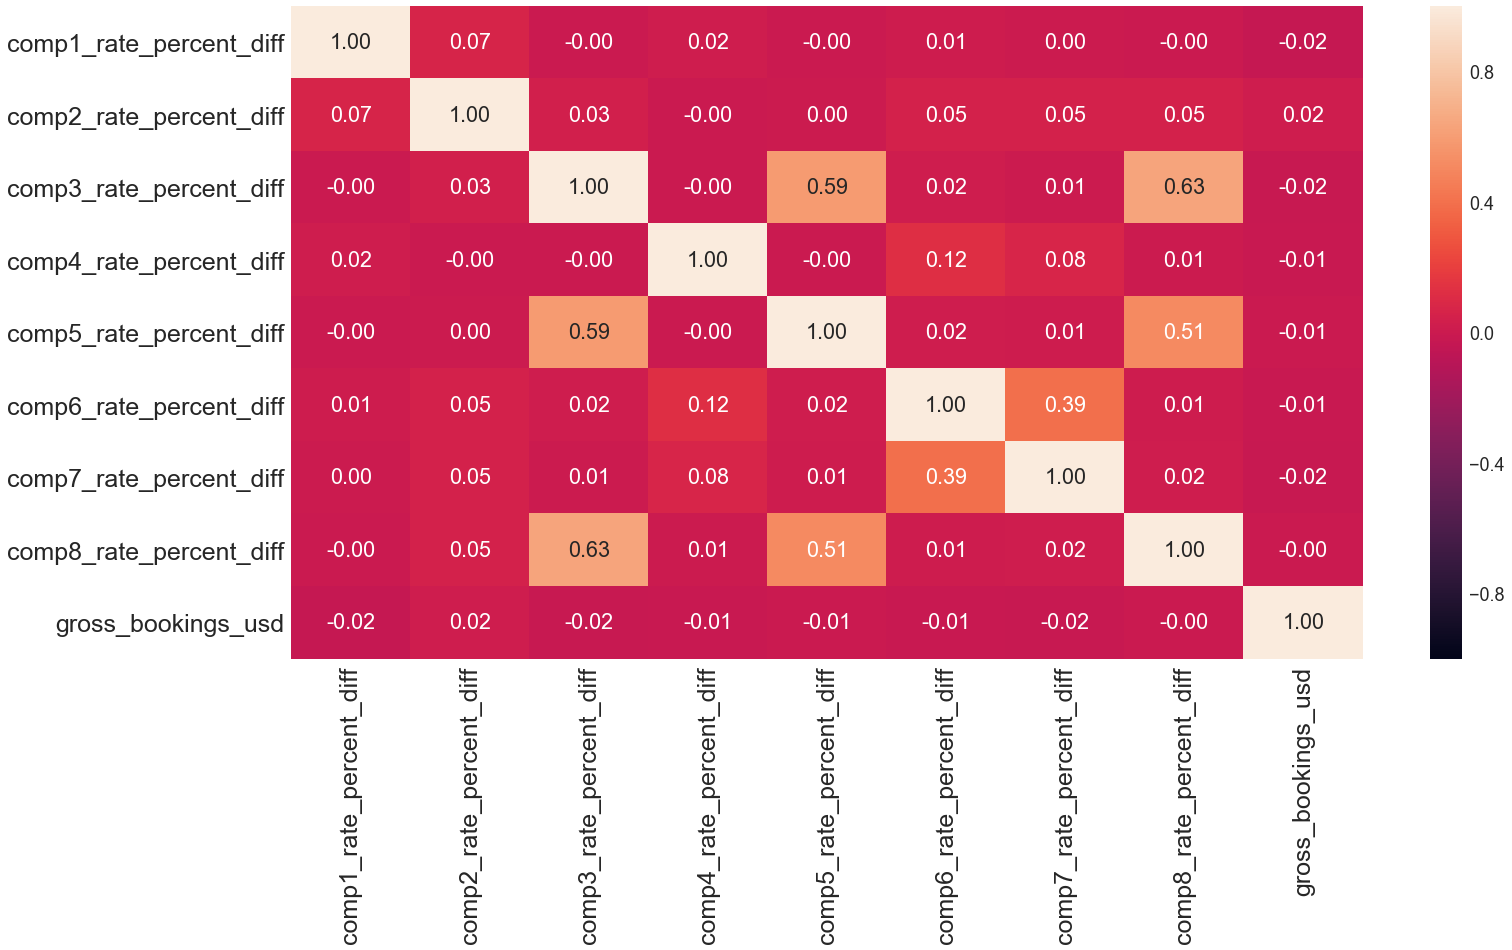

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (24,12)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

cols = [
'comp1_rate_percent_diff','comp2_rate_percent_diff'
,'comp3_rate_percent_diff','comp4_rate_percent_diff'
,'comp5_rate_percent_diff','comp6_rate_percent_diff'
,'comp7_rate_percent_diff','comp8_rate_percent_diff','gross_bookings_usd']
corr = train[cols].corr(method='pearson')

fig, ax = plt.subplots()
ax.set_xticklabels(labels = corr.columns.values,rotation=90)
sns.set(font_scale=1.8)
sns.heatmap(corr,     
            yticklabels=corr.columns.values, ax=ax,annot = True, fmt = '.2f'
           , vmin=-1, vmax=1)
ax.tick_params(labelsize=25)

gc.collect()

In [16]:
def correlationplot(df):
    import seaborn as sns
    corr = df.corr(method='pearson')
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, annot = True, fmt = '.2f')  
    
def frequencyplot(df, x, y):
    pd.crosstab(df[x], df[y]).plot(kind='bar')
    plt.title('{0} Frequency for {1}'.format(y.title(), x.title()))
    plt.xlabel('{0}'.format(x.title()))
    plt.xticks(rotation=45)
    plt.ylabel('Frequency of {0}'.format(y.title()))  
    plt.show()
    
def densityplot(df, x, y):
    for i in sample_train[y].unique():
        # Subset to the airline
        subset = sample_train[sample_train[y] == i]
    
        # Draw the density plot
        sns.distplot(subset[x], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = i)
    
        # Plot formatting
        plt.legend(prop={'size': 16}, title = y.title())
        plt.title('Density Plot with %s'%y.title())
        plt.xlabel('%s'%x.title())
        plt.ylabel('Density')
        


1. Winning The Competition
The winner will be rewarded with the fame and glory of winning the 2019 VU Data Mining Techniques cup. Your accuracy score will be determined as follows (cf. Kaggle):

The evaluation metric for this competition is Normalized Discounted Cumulative Gain calculated per query and averaged over all queries. See http://dalelane.co.uk/blog/?p=3403 for more details.

Hotels for each user query are assigned relevance grades as follows:

5 - The user purchased a room at this hotel
1 - The user clicked through to see more information on this hotel
0 - The user neither clicked on this hotel nor purchased a room at this hotel
Submissions for each user query should recommend hotels in order from the highest grade (most likely to purchase a hotel room) to the lowest grade (least likely to purchase a hotel room or click on the hotel). We know that the correct values for the test set are available online, of course, you are not allowed to use this. If we suspect that you used those values we will ask you for your code and check whether your results are reproducible using the training set as a basis for generating your predictive model. You should upload your prediction on this website.

2. Getting a High Grade
You can get 100 marks for this assignment, so half of your final grade depends on this. 60% of this mark can be achieved by submitting a nice and thorough report, 20% will come from where you end up in the competition and 20% will be based on the process report. Regarding the competition-based marks, we will see how good your submissions are, and then we'll decide if you'll get the marks based on accuracy value, or rank in the competition.

In [30]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [34]:
from random import sample 
import random
random.seed(1)

user_list = list(train['srch_id'].unique())
sample_list = sample(user_list,round(len(user_list) * 0.07))
sample_train = train[train['srch_id'].isin(sample_list)]
sample_train
#sample_train = train.sample(n=300000)
#print(sample_train)

del user_list,sample_list

In [22]:
sample_train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
750,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,1110,2,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
751,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,5441,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
752,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,8483,2,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
753,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,8729,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
754,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,18026,2,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
755,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,26203,3,4.5,...,NaN,NaN,NaN,NaN,-1.0,0.0,14.0,0,NaN,0
756,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,32917,4,4.5,...,NaN,NaN,NaN,NaN,-1.0,0.0,12.0,0,NaN,0
757,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,32919,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
758,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,39592,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
759,64,2012-12-27 11:33:34,5,219,NaN,NaN,219,45129,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [210]:
idlist = ['srch_id','prop_id']
featurelist = ['comp1_rate_percent_diff','comp2_rate_percent_diff'
               ,'comp3_rate_percent_diff', 'comp4_rate_percent_diff'
               ,'comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff'
               ,'comp8_rate_percent_diff','prop_log_historical_price','price_usd']
targetlist = ['booking_bool']
sample_train_XY = sample_train[idlist + featurelist + targetlist]

sample_train_XY_processed=sample_train_XY.reset_index()
sample_train_XY_processed_index = sample_train_XY_processed['index'].to_list()
test_processed = test.reset_index()
test_processed_index = test_processed['index'].to_list()

#For now, mark all missing values with an apparent different value
for f in featurelist:
    sample_train_XY_processed[f]=sample_train_XY_processed[f].fillna(-1)
    test_processed[f]=test_processed[f].fillna(-1)

X_train = sample_train_XY_processed[idlist + featurelist]
X_train = X_train.set_index(idlist)
Y_train = sample_train_XY_processed[idlist + targetlist]
Y_train = Y_train.set_index(idlist)
X_test = test_processed[idlist + featurelist]
X_test = X_test.set_index(idlist)
del sample_train_XY,sample_train_XY_processed,test_processed
gc.collect()

AttributeError: 'function' object has no attribute 'reset_index'

In [41]:
from sklearn.multioutput import MultiOutputClassifier


In [61]:
def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

To do (not in order of importance):
- Write manual grid search without cross validation, theres plenty enough data.
- write a fast ndcg function.
- Check whether the sample is representative
- Check which features to include based on something.
- MAYBE: check for very infrequent values in variables, change to NAN and then:
- Analyze imputing methods for missing values
- Run models based on booking_bool, click_bool and maybe even gross_booking_usd
    - MultiOutputClassifier
- First predict position variable, use this in prediction of click & booking bool.
- Analyze solutions from other kaggle competitions.
    - LAMBDAmart was found to be pretty good.
    - Where did people pay attention to regarding the data sampling?
- Think of shit yourself

- Variables:
    - price
    - disirability of hotels location
    - popularity of property
    - reviews
    - price position compared to competitors
    - position

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score,precision_score

n_estimators = [i for i in range(1,1000,5)]
max_depth = [i for i in range(1,99,2)]
min_samples_split = [i for i in range(5,50,5)]
min_samples_leaf = [i for i in range(5,100,5)]
params_RF ={
            'n_estimators' : [3,5,7,10,15]
            ,'max_features' : [5,10]
            ,'max_depth' : [5,10,15]
            ,'min_samples_split': [5,10]
            ,'min_samples_leaf' : [1,5]
            ,'class_weight'  : [{0:.5,1:.5}]
         }

#params_RF ={
#            'n_estimators' : [50]
#            ,'max_depth' : [75]
#            ,'min_samples_split': [25]
#            ,'min_samples_leaf' : [10]
#            ,'class_weight'  : [{0:.4,1:.6}]
#            ,'max_features' : [ 'sqrt']
#         }

folds = 5
param_comb = 40

model_RF = RandomForestClassifier()
 
skf_RF = StratifiedKFold(n_splits=folds)
    
#my_scorer_RF = make_scorer(my_scorer,needs_proba = True, greater_is_better=True)

#grid_search_RF = RandomizedSearchCV(model_RF, n_iter=param_comb,param_distributions=params_RF,scoring=my_scorer_RF, n_jobs=10, cv=skf_RF)
grid_search_RF = RandomizedSearchCV(model_RF, n_iter=param_comb,param_distributions=params_RF,scoring='recall', n_jobs=10, cv=skf_RF)

grid_search_RF.fit(X_train, Y_train)

print('\n All results:')
print(grid_search_RF.cv_results_)
print('\n Best estimator:')
print(grid_search_RF.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(grid_search_RF.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search_RF.best_params_)
results = pd.DataFrame(grid_search_RF.cv_results_)

del n_estimators,max_depth,min_samples_split,min_samples_leaf,params_RF,folds,param_comb,model_RF,skf_RF

#results.to_csv('RF-grid-search-results-15-filtered.csv', index=False)

C:\Users\Jesse\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



 All results:
{'mean_fit_time': array([ 4.80624256,  6.35870214,  5.52889771,  8.92599125,  9.07875223,
       24.48441224,  7.18643417,  7.63280921, 13.04568901,  4.87356586,
        3.22138772,  7.7165657 ,  5.67023826,  3.39971008, 19.5966042 ,
        2.34971809,  3.70269904, 29.13269691,  7.44609118,  9.66555271,
       13.95628324, 13.32156849, 27.46236396,  4.15867934,  8.14462037,
        7.98305387,  7.31803164,  5.5589386 ,  9.64161839, 26.90346475,
       10.55039496,  5.94629898, 13.48155093, 11.33289542, 38.45886497,
       10.78077283,  8.02524729, 22.37876229, 11.16653843,  2.28887901]), 'std_fit_time': array([0.17689998, 0.29484812, 0.0497959 , 0.17414364, 0.38627694,
       0.61356448, 0.21742409, 0.13861687, 0.11438523, 0.11338111,
       0.06841099, 0.06196914, 0.1353631 , 0.15053285, 0.15582274,
       0.0783559 , 0.07858569, 0.53503425, 0.0927946 , 0.24432136,
       0.22311504, 0.33151659, 0.02945881, 0.09804606, 0.04843272,
       0.05889187, 0.06745478, 1.27163

C:\Users\Jesse\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jesse\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jesse\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jesse\Anaconda3\lib\site-packages\sklearn\util

In [61]:
X_test.isnull().values.any()

False

In [69]:
def toint(x):
    return int(x)

def predictTest(testdata,model):
    #outcome is such that it can be submitted at kaggle right away.
    #Preprocessing of testdata should be done beforehand, srch_id and prop_id should be set as index
    pred = model.predict_proba(X_test).T[1]
    testdata = testdata.reset_index()
    m = np.matrix([testdata['srch_id'].to_list(),pred,test['prop_id'].to_list()]).T
    pred_df = pd.DataFrame(m,columns=['srch_id','prediction','prop_id'])
    pred_df['prop_id'] = pred_df['prop_id'].apply(lambda x:toint(x))
    pred_df['srch_id'] = pred_df['srch_id'].apply(lambda x:toint(x))
    
    final_pred_df = pred_df.sort_values(by=['srch_id','prediction'], ascending=[True,False])
    #print(final_pred_df) #for those who don't believe the df is not sorted per search_id by the prediction
    final_pred_df = final_pred_df.reset_index()
    final_pred_df = final_pred_df.set_index(['srch_id'])
    del final_pred_df['prediction'],final_pred_df['index']
    
    return final_pred_df

#Get prediction seperatly
#pred = grid_search_RF.best_estimator_.predict_proba(X_test).T[1]

model = grid_search_RF.best_estimator_
pred = predictTest(X_test,model)


In [71]:
pred.to_csv('pred2.csv')

In [ ]:
import xgboost as xgb
from xgboost import XGBRanker
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics.scorer import make_scorer

params = {
        'min_child_weight': [1,3, 5,7, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [8,10,12,14,16,18,20],
        #'reg_alpha':[0,3,5],
        'reg_lambda':[1,3,5]
        }
folds = 10
param_comb = 2

xgb_model = XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

skf = StratifiedKFold(n_splits=folds, shuffle = True)

#add early_stopping_rounds here?
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=10, cv=skf, verbose=3 )

random_search_xgb.fit(X2_train,Y2_train)

print('\n All results:')
print(random_search_xgb.cv_results_)
print('\n Best estimator:')
print(random_search_xgb.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_xgb.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search_xgb.best_params_)
results = pd.DataFrame(random_search_xgb.cv_results_)

results.to_csv('xgb-random-grid-search-results-04.csv', index=False)

In [81]:
user_list = list(train['srch_id'].unique())
user_list_train = user_list[0:round(len(user_list)*0.7)]
user_list_val = user_list[round(len(user_list)*0.7):len(user_list)]

idlist = ['srch_id','prop_id']
featurelist = ['comp1_rate_percent_diff','comp2_rate_percent_diff'
               ,'comp3_rate_percent_diff', 'comp4_rate_percent_diff'
               ,'comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff'
               ,'comp8_rate_percent_diff','prop_log_historical_price','price_usd']
targetlist = ['relevance_grades']
sample_train_XY = sample_train[idlist + featurelist + targetlist]

sample_train_XY_processed=sample_train_XY.reset_index()
sample_train_XY_processed_index = sample_train_XY_processed['index'].to_list()
test_processed = test.reset_index()
test_processed_index = test_processed['index'].to_list()

#For now, mark all missing values with an apparent different value
for f in featurelist:
    sample_train_XY_processed[f]=sample_train_XY_processed[f].fillna(-1)
    test_processed[f]=test_processed[f].fillna(-1)

sample_train_XY_processed_train = sample_train_XY_processed[sample_train_XY_processed['srch_id'].isin(user_list_train)]
sample_train_XY_processed_val = sample_train_XY_processed[sample_train_XY_processed['srch_id'].isin(user_list_val)]       
    
X_train = sample_train_XY_processed_train[idlist + featurelist]
X_train = X_train.set_index(idlist)
Y_train = sample_train_XY_processed_train[idlist + targetlist]
Y_train = Y_train.set_index(idlist)
X_val = sample_train_XY_processed_val[idlist + featurelist]
X_val = X_val.set_index(idlist)
Y_val = sample_train_XY_processed_val[idlist + targetlist]
Y_val = Y_val.set_index(idlist)
X_test = test_processed[idlist + featurelist]
X_test = X_test.set_index(idlist)
del sample_train_XY,sample_train_XY_processed,test_processed
gc.collect()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000198899CB208>>
Traceback (most recent call last):
  File "C:\Users\Jesse\Anaconda3\lib\site-packages\xgboost\core.py", line 531, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
  File "C:\Users\Jesse\Anaconda3\lib\site-packages\xgboost\core.py", line 178, in _check_call
    raise XGBoostError(_LIB.XGBGetLastError())
xgboost.core.XGBoostError: b'[20:19:35] C:\\Users\\Administrator\\Desktop\\xgboost\\src\\c_api\\c_api.cc:756: DMatrix/Booster has not been intialized or has already been disposed.'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000198899D9BE0>>
Traceback (most recent call last):
  File "C:\Users\Jesse\Anaconda3\lib\site-packages\xgboost\core.py", line 531, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
  File "C:\Users\Jesse\Anaconda3\lib\site-packages\xgboost\core.py", line 178, in _check_call
    raise XGBoostErr

4436

In [82]:
X_train_test = X_train.reset_index()
del X_train_test['prop_id']

srch_id_count = X_train_test[['srch_id']]
srch_id_count['count'] = 1
groups_count_train = np.array(srch_id_count.groupby(['srch_id'],axis=0).count()['count'])

X_val_test = X_val.reset_index()
del X_val_test['prop_id']

srch_id_count = X_val_test[['srch_id']]
srch_id_count['count'] = 1
groups_count_val = np.array(srch_id_count.groupby(['srch_id'],axis=0).count()['count'])

del srch_id_count,X_train_test,X_val_test

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'objective': 'rank:ndcg',
        'eval_metric':'ndcg@5-',
        'max_depth': 3
        #'reg_alpha':[0,3,5],

        }

dtrain = xgb.DMatrix(data=X_train, label=Y_train)
dtrain.set_group(group=groups_count_train)

dval = xgb.DMatrix(data=X_val, label=Y_val)
dval.set_group(group=groups_count_val)
#dtrain.set_group(np.array(group_sizes))
evals_result = {}
watchlist = [(dval,'test'),(dtrain, 'train')]
model_XGB = xgb.train(params=params,dtrain=dtrain,num_boost_round=300,evals=watchlist,evals_result=evals_result)
pred = model_XGB.predict(dval)
#model = xgb.train(params={'objective': 'rank:ndcg'}, dtrain=dtrain, num_boost_round=10)
#XGB.fit(X_train, Y_train)
#pred_XGB = XGB.predict_proba(X_test)
#ROC_XGB = roc_auc_score(np.array(X_test), np.array(pred_XGB.T[1]))


[0]	test-ndcg@5-:0.190474	train-ndcg@5-:0.202806
[1]	test-ndcg@5-:0.192327	train-ndcg@5-:0.203677
[2]	test-ndcg@5-:0.192395	train-ndcg@5-:0.204546
[3]	test-ndcg@5-:0.192362	train-ndcg@5-:0.204558
[4]	test-ndcg@5-:0.205467	train-ndcg@5-:0.214404
[5]	test-ndcg@5-:0.208853	train-ndcg@5-:0.219038
[6]	test-ndcg@5-:0.212488	train-ndcg@5-:0.222826
[7]	test-ndcg@5-:0.213535	train-ndcg@5-:0.225195
[8]	test-ndcg@5-:0.220164	train-ndcg@5-:0.231414
[9]	test-ndcg@5-:0.219442	train-ndcg@5-:0.232302
[10]	test-ndcg@5-:0.221141	train-ndcg@5-:0.233808
[11]	test-ndcg@5-:0.223996	train-ndcg@5-:0.23543
[12]	test-ndcg@5-:0.223919	train-ndcg@5-:0.23647
[13]	test-ndcg@5-:0.223909	train-ndcg@5-:0.237003
[14]	test-ndcg@5-:0.227634	train-ndcg@5-:0.238494
[15]	test-ndcg@5-:0.227534	train-ndcg@5-:0.240846
[16]	test-ndcg@5-:0.227875	train-ndcg@5-:0.242078
[17]	test-ndcg@5-:0.229114	train-ndcg@5-:0.243944
[18]	test-ndcg@5-:0.228554	train-ndcg@5-:0.243522
[19]	test-ndcg@5-:0.227853	train-ndcg@5-:0.244083
[20]	test-nd

[164]	test-ndcg@5-:0.235993	train-ndcg@5-:0.2668
[165]	test-ndcg@5-:0.235977	train-ndcg@5-:0.267565
[166]	test-ndcg@5-:0.236111	train-ndcg@5-:0.267651
[167]	test-ndcg@5-:0.236277	train-ndcg@5-:0.267672
[168]	test-ndcg@5-:0.235804	train-ndcg@5-:0.267802
[169]	test-ndcg@5-:0.235677	train-ndcg@5-:0.267814
[170]	test-ndcg@5-:0.235606	train-ndcg@5-:0.267824
[171]	test-ndcg@5-:0.235935	train-ndcg@5-:0.267689
[172]	test-ndcg@5-:0.235761	train-ndcg@5-:0.267926
[173]	test-ndcg@5-:0.235376	train-ndcg@5-:0.268096
[174]	test-ndcg@5-:0.235715	train-ndcg@5-:0.268339
[175]	test-ndcg@5-:0.235427	train-ndcg@5-:0.268321
[176]	test-ndcg@5-:0.236234	train-ndcg@5-:0.268128
[177]	test-ndcg@5-:0.235444	train-ndcg@5-:0.268155
[178]	test-ndcg@5-:0.23552	train-ndcg@5-:0.26813
[179]	test-ndcg@5-:0.235465	train-ndcg@5-:0.268102
[180]	test-ndcg@5-:0.235401	train-ndcg@5-:0.268148
[181]	test-ndcg@5-:0.235549	train-ndcg@5-:0.268218
[182]	test-ndcg@5-:0.235385	train-ndcg@5-:0.268224
[183]	test-ndcg@5-:0.235702	train-n

In [125]:
dtest = xgb.DMatrix(data=X_test)

pred = model_XGB.predict(dtest)

t = X_test.reset_index()
t = t[['srch_id','prop_id']]
matrixA={}
matrixA['srch_id']=t['srch_id']
matrixA['prop_id']=t['prop_id']
matrixA['prediction']= pred
pred_df = pd.DataFrame(matrixA)

In [126]:
def toint(x):
    return int(x)

def predictTest(pred_df):
    #outcome is such that it can be submitted at kaggle right away.
    #Preprocessing of testdata should be done beforehand, srch_id and prop_id should be set as index
    
    pred_df['prop_id'] = pred_df['prop_id'].apply(lambda x:toint(x))
    pred_df['srch_id'] = pred_df['srch_id'].apply(lambda x:toint(x))
    
    final_pred_df = pred_df.sort_values(by=['srch_id','prediction'], ascending=[True,False])
    #print(final_pred_df) #for those who don't believe the df is not sorted per search_id by the prediction
    final_pred_df = final_pred_df.reset_index()
    final_pred_df = final_pred_df.set_index(['srch_id'])
    del final_pred_df['prediction'],final_pred_df['index']
    
    return final_pred_df

#Get prediction seperatly
#pred = grid_search_RF.best_estimator_.predict_proba(X_test).T[1]


pred = predictTest(pred_df)

In [128]:
pred

,prop_id
srch_id,
1,72090
1,61632
1,24194
1,82231
1,37567
1,34263
1,54937
1,3180
1,128085


In [127]:
pred.to_csv('pred3.csv')